Clase 2

In [77]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [78]:
image_array = np.zeros((10, 10, 3))+ 255

image_array[1:9, 5] = [255,   0,   0]
image_array[1, 2:9] = [  0, 255,   0]
image_array[8, 2:9] = [  0,   0, 255]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


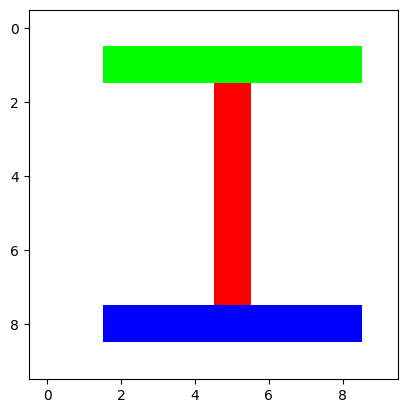

In [79]:
plt.imshow(image_array)

Clase 3

In [80]:
def leer_imagen(ruta_imagen):
    # Abrir la imagen
    img = Image.open (ruta_imagen) # Insertar código aquí
        
    return img

def obtener_info_imagen(img):
    # Obtener el número de canales
    modo = img.mode
    if modo == 'L':  # Escala de grises
        num_canales = 1 # Ingresa valor aquí
    elif modo == 'RGB':  # Imagen RGB
        num_canales = 3 # Ingresa valor aquí
    elif modo == 'RGBA':  # Imagen RGBA
        num_canales = 4 # Ingresa valor aquí
    else:
        num_canales = len(modo)  # Otros modos de imagen
    
    # Obtener las dimensiones de la imagen
    dimensiones = img.size  # Ingresa valor aquí para obtener (ancho, alto)
    
    return num_canales, dimensiones

def imagen_a_arreglo(img):
    # Convertir la imagen a un arreglo de NumPy
    arreglo = np.array(img) # Insertar código aquí
    return arreglo

def estadisticas_intensidad(arreglo_img):
    # Calcular el promedio y la desviación estándar
    promedio = np.mean(arreglo_img) # Insertar código aquí
    desviacion_estandar = np.std(arreglo_img) # Insertar código aquí
    
    return promedio, desviacion_estandar

def estadisticas_por_canal(arreglo_img):
    # Verificar el número de dimensiones del arreglo
    if len(arreglo_img.shape) == 2:
        # Imagen de un solo canal
        promedio = np.mean(arreglo_img) # Insertar código aquí
        desviacion_estandar = np.std(arreglo_img) # Insertar código aquí
        resultados = {
            'Canal_1': {
                'Promedio': promedio,
                'Desviación Estándar': desviacion_estandar
            }
        }
    elif len(arreglo_img.shape) == 3:
        # Imagen de múltiples canales
        resultados = {}
        num_canales = arreglo_img.shape[2]
        
        for canal in range(num_canales): # Insertar código aquí
            promedio = np.mean(arreglo_img[:, :, canal])
            desviacion_estandar = np.std(arreglo_img[:, :, canal])
            resultados[f'Canal_{canal+1}'] = {
                'Promedio': promedio,
                'Desviación Estándar': desviacion_estandar
            }
    else:
        raise ValueError("El arreglo de imagen debe tener 2 o 3 dimensiones.")
    
    return resultados

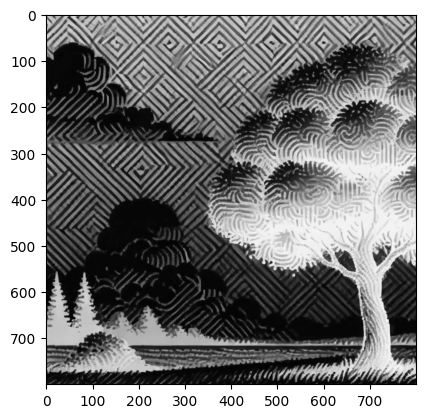

In [81]:
image = leer_imagen("data/imagen0.png")
arreglo_image = imagen_a_arreglo(image)
image_gray = 0.2989 * arreglo_image[:, :, 0] + 0.5870 * arreglo_image[:, :, 1] + 0.1140 * arreglo_image[:, :, 2]

image_crop = image_gray[0:800, 0:800]
plt.imshow(image_crop, cmap='Grays', vmin=0, vmax=255)

Text(0.5, 1.0, 'Cuadrante 4')

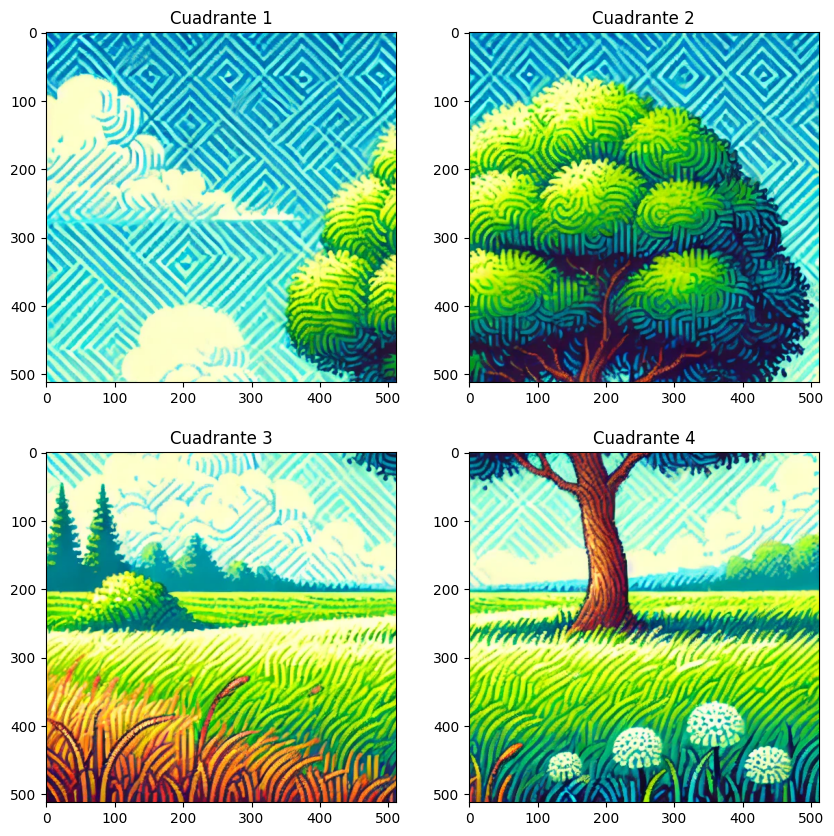

In [82]:
image = leer_imagen("data/imagen0.png")
arreglo_image = imagen_a_arreglo(image)

num_canales, dimensiones = obtener_info_imagen(image)

height, width = dimensiones

image_crop_1 = arreglo_image[0:height//2     , 0:width//2    , :]
image_crop_2 = arreglo_image[0:height//2     , width//2:width, :]
image_crop_3 = arreglo_image[height//2:height, 0:width//2    , :]
image_crop_4 = arreglo_image[height//2:height, width//2:width, :]

# Mostrar los cuatro cuadrantes juntos
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Configuración de subplots para cada cuadrante
axs[0, 0].imshow(image_crop_1)
axs[0, 0].set_title("Cuadrante 1")

axs[0, 1].imshow(image_crop_2)
axs[0, 1].set_title("Cuadrante 2")

axs[1, 0].imshow(image_crop_3)
axs[1, 0].set_title("Cuadrante 3")

axs[1, 1].imshow(image_crop_4)
axs[1, 1].set_title("Cuadrante 4")

Text(0.5, 1.0, 'Mocho')

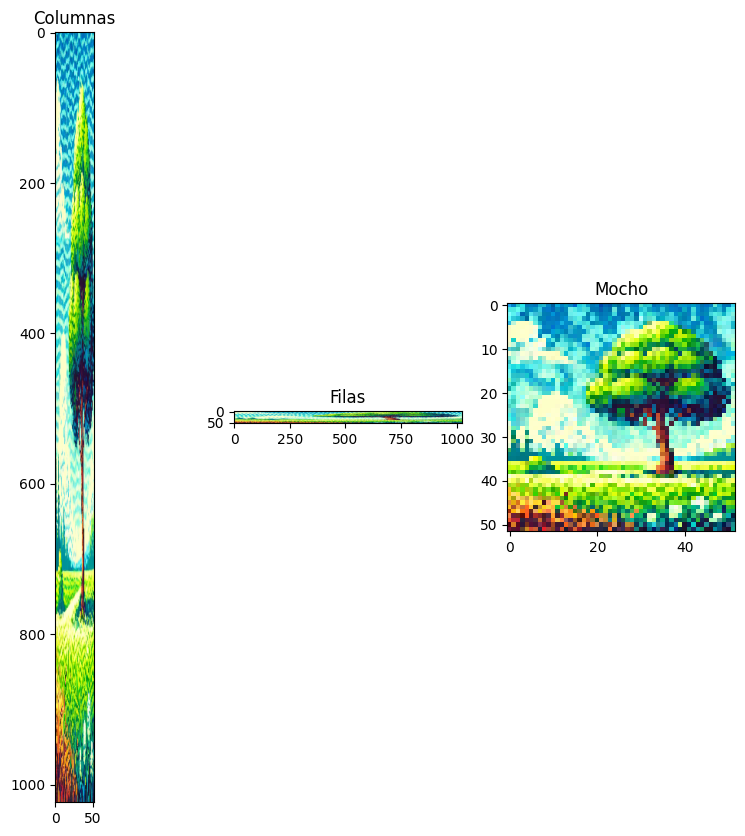

In [96]:
image = leer_imagen("data/imagen0.png")
arreglo_image = imagen_a_arreglo(image)

num_canales, dimensiones = obtener_info_imagen(image)

height, width = dimensiones

image_crop_MC = arreglo_image[:  , ::20, :]
image_crop_MF = arreglo_image[::20, :  , :]
image_crop_MM = arreglo_image[::20, ::20, :]

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

# Configuración de subplots para cada cuadrante
axs[0].imshow(image_crop_MC)
axs[0].set_title("Columnas")

axs[1].imshow(image_crop_MF)
axs[1].set_title("Filas")

axs[2].imshow(image_crop_MM)
axs[2].set_title("Mocho")

In [ ]:
image_MC = Image.fromarray(image_crop_MC)
image_MC.save("data/Columnas.png")

image_MF = Image.fromarray(image_crop_MF)
image_MF.save("data/Filas.png")

image_MM = Image.fromarray(image_crop_MM)
image_MM.save("data/Mocho.png")